<a href="https://colab.research.google.com/github/ViniciusKanh/neural-networks-uci-datasets-unesp/blob/main/Trabalho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌸 Exercício 1 – Dataset Iris com Perceptron

Neste primeiro bloco, vamos:

- 📥 Carregar o famoso dataset Iris, que possui 150 amostras de flores classificadas em 3 espécies diferentes.
- 🔍 Visualizar as dimensões do conjunto de dados.
- 🧪 Separar as variáveis preditoras (X) da variável-alvo (y).
- 🧾 Mostrar um exemplo de dado e os nomes das classes.

Esse passo é essencial para entender o problema de classificação que queremos resolver com o Perceptron!


In [1]:
# 📦 Importação de bibliotecas essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 🎲 Garantindo reprodutibilidade
np.random.seed(42)

# 🌸 Carregando o dataset Iris
iris = load_iris()
X = iris.data                      # Atributos: sépala e pétala (comprimento e largura)
y = iris.target                   # Classes: 0 - setosa, 1 - versicolor, 2 - virginica
target_names = iris.target_names  # Nomes das classes

# 🔍 Visualizando informações básicas
print("Formato dos dados:", X.shape)
print("Classes únicas:", np.unique(y))
print("Primeiro exemplo de entrada:", X[0])
print("Nome das classes:", target_names)


Formato dos dados: (150, 4)
Classes únicas: [0 1 2]
Primeiro exemplo de entrada: [5.1 3.5 1.4 0.2]
Nome das classes: ['setosa' 'versicolor' 'virginica']


# 🧪 Pré-processamento dos dados: Normalização + Split

Agora vamos realizar duas etapas importantes antes de treinar o Perceptron:

- 🔄 **Normalização (StandardScaler)**: padroniza os atributos para média 0 e desvio padrão 1. Isso ajuda no desempenho e convergência do algoritmo.
- ✂️ **Divisão do dataset** em:
  - Treinamento (70%)
  - Validação (15%)
  - Teste (15%)

Esse particionamento permite:
- Treinar o modelo com uma base consistente
- Avaliar durante o treino (validação)
- Testar depois com dados nunca vistos (teste)

Vamos lá! 🚀


In [2]:
# 🔄 Normalizando os dados (média = 0, desvio padrão = 1)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# ✂️ Dividindo o dataset: 70% treino, 15% validação, 15% teste
# Primeira divisão: treino (70%) e restante (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_normalized, y, test_size=0.3, stratify=y, random_state=42
)

# Segunda divisão: dos 30% restantes, 50% para validação e 50% para teste → 15% cada
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# 📊 Confirmando o tamanho de cada subconjunto
print("Treinamento:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)


Treinamento: (105, 4)
Validação: (22, 4)
Teste: (23, 4)


# 🧠 Perceptron Multiclasse com One-vs-Rest (OvR)

Nesta etapa vamos implementar o algoritmo Perceptron "do zero", com as seguintes características:

- 🧮 Saída binária (0 ou 1), aplicada a cada classe separadamente (One-vs-Rest)
- 🔢 Função de ativação: degrau (step) para decisão, mas usamos o valor linear para calcular erro
- 🔁 Treinamento por épocas com:
  - Taxa de aprendizado ajustável
  - Cálculo do erro quadrático médio (MSE) em cada época
- 📉 Plot do erro para acompanhar a convergência

Vamos treinar 3 perceptrons: um para cada classe, onde cada um aprende a distinguir uma classe das outras duas.

🚨 Importante: todos os pesos são inicializados aleatoriamente, e os experimentos devem ser repetidos com diferentes seeds depois.


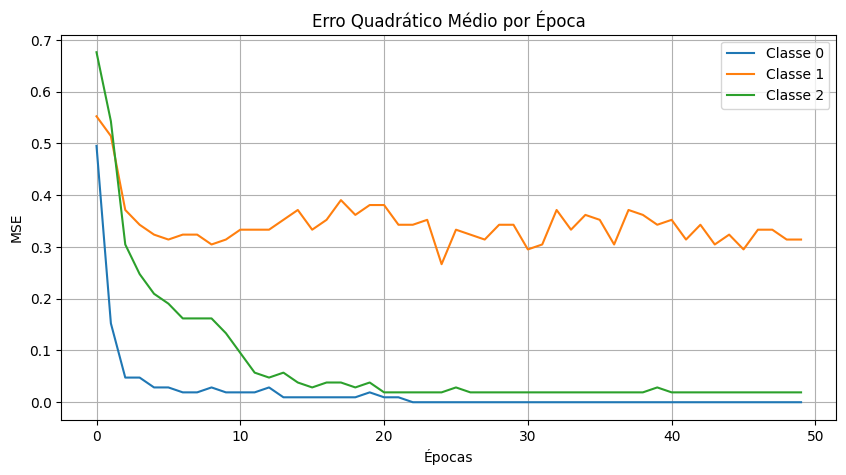

In [3]:
# ⚙️ Função de ativação degrau
def step_function(x):
    return np.where(x >= 0, 1, 0)

# 🧠 Classe Perceptron com treinamento e previsão
class PerceptronOVR:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(input_size + 1)  # +1 para o bias

    def train(self, X, y):
        # Adiciona bias (coluna de 1s no início)
        X_bias = np.c_[np.ones(X.shape[0]), X]
        self.errors = []

        for epoch in range(self.epochs):
            total_error = 0
            for xi, target in zip(X_bias, y):
                net_input = np.dot(xi, self.weights)
                output = step_function(net_input)
                error = target - output
                self.weights += self.learning_rate * error * xi
                total_error += error**2
            mse = total_error / len(y)
            self.errors.append(mse)

    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return step_function(np.dot(X_bias, self.weights))

# 🚀 Função para treinar 3 perceptrons (um para cada classe)
def train_multiclass_perceptron(X_train, y_train, learning_rate=0.01, epochs=100):
    classifiers = []
    for class_id in np.unique(y_train):
        # Cria um vetor binário para essa classe (1 para a classe atual, 0 para as outras)
        y_binary = np.where(y_train == class_id, 1, 0)
        perceptron = PerceptronOVR(input_size=X_train.shape[1],
                                   learning_rate=learning_rate,
                                   epochs=epochs)
        perceptron.train(X_train, y_binary)
        classifiers.append(perceptron)
    return classifiers

# ⏱️ Treinando os modelos (3 perceptrons)
learning_rate = 0.01
epochs = 50
perceptrons = train_multiclass_perceptron(X_train, y_train, learning_rate, epochs)

# 📈 Plotando erro de convergência para cada classe
plt.figure(figsize=(10, 5))
for i, perceptron in enumerate(perceptrons):
    plt.plot(perceptron.errors, label=f'Classe {i}')
plt.title('Erro Quadrático Médio por Época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


# 📉 Análise Científica – Convergência do Perceptron

O gráfico acima representa a evolução do **Erro Quadrático Médio (MSE)** ao longo das épocas de treinamento dos três perceptrons, treinados individualmente com a abordagem **One-vs-Rest (OvR)**.

- ✅ **Classe 0 (Iris Setosa):**  
  O modelo atingiu convergência rápida, com erro próximo de zero já nas primeiras 10 épocas. Isso indica que esta classe possui **alta separabilidade linear**, sendo facilmente aprendida pelo Perceptron.

- ⚠️ **Classe 1 (Iris Versicolor):**  
  O erro manteve-se elevado e instável mesmo após várias épocas. Este comportamento sugere **sobreposição significativa** entre esta classe e as demais, o que prejudica a separação linear. Pode indicar a necessidade de técnicas mais robustas ou redes mais complexas.

- ✅ **Classe 2 (Iris Virginica):**  
  O modelo apresentou boa convergência, com redução contínua do erro até um patamar próximo de zero. Embora mais difícil que a classe 0, ainda demonstra **boa separabilidade linear**.

### 📌 Conclusão:
O desempenho dos perceptrons evidencia que o algoritmo é eficaz para as classes 0 e 2, mas enfrenta limitações com a classe 1. Isso ressalta a importância de se considerar **características geométricas dos dados** ao optar por modelos lineares.


# 📊 Avaliação do Modelo com Matrizes de Confusão

Nesta etapa, serão avaliadas as previsões dos perceptrons nos três conjuntos separados anteriormente:

- 🧪 Treinamento (para verificar se o modelo aprendeu bem)
- 🔁 Validação (para ajustar hiperparâmetros, se necessário)
- 🔬 Teste (para avaliar o desempenho final)

Utilizaremos:

- Acurácia (% de classificações corretas)
- Matrizes de confusão, que mostram o desempenho por classe



🔎 Conjunto: Treinamento
Acurácia: 0.8286


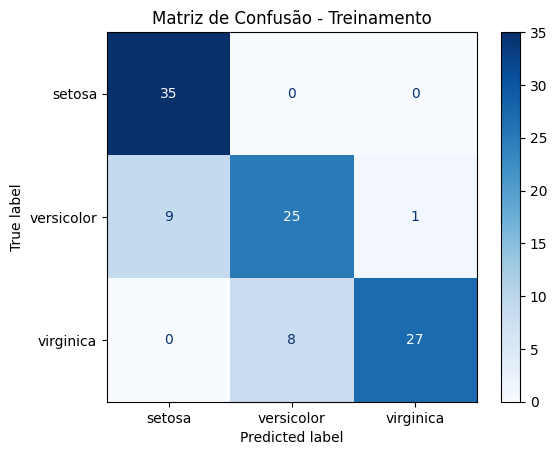


🔎 Conjunto: Validação
Acurácia: 0.5909


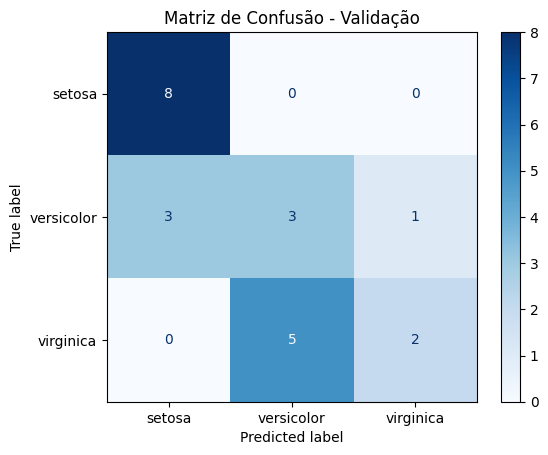


🔎 Conjunto: Teste
Acurácia: 0.8261


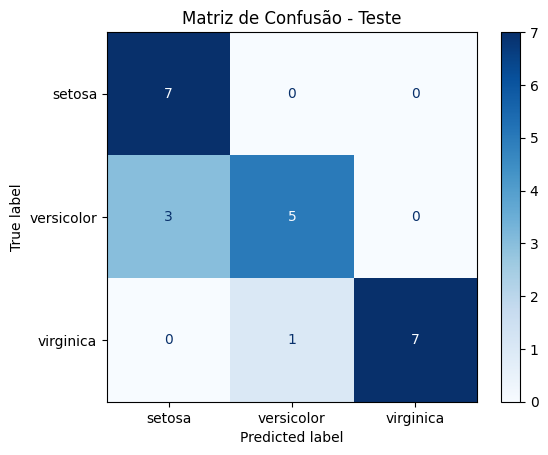

In [4]:
# 🧮 Função auxiliar para previsões One-vs-Rest
def predict_ovr(X, classifiers):
    # Cada perceptron retorna uma probabilidade binária para sua classe
    predictions = np.array([clf.predict(X) for clf in classifiers])
    # A classe com maior resposta positiva (ou mais ativação) é escolhida
    return np.argmax(predictions, axis=0)

# 🔍 Avaliação em cada conjunto
for split_name, X_split, y_split in [
    ("Treinamento", X_train, y_train),
    ("Validação", X_val, y_val),
    ("Teste", X_test, y_test),
]:
    y_pred = predict_ovr(X_split, perceptrons)
    acc = accuracy_score(y_split, y_pred)

    print(f"\n🔎 Conjunto: {split_name}")
    print(f"Acurácia: {acc:.4f}")

    # 🧾 Gerando matriz de confusão
    cm = confusion_matrix(y_split, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {split_name}")
    plt.show()


# 📊 Análise Científica – Desempenho do Perceptron por Conjunto

A seguir, apresenta-se a análise quantitativa e qualitativa do desempenho do modelo Perceptron nos conjuntos de **treinamento**, **validação** e **teste**, com base nas matrizes de confusão e acurácias observadas.

---

## 🧪 Treinamento – Acurácia: 82,86%
- A matriz de confusão mostra excelente desempenho para a classe **Setosa**, com acerto de 100%.
- As classes **Versicolor** e **Virginica** apresentam **confusão mútua**, com parte de seus exemplos sendo classificadas incorretamente entre si (9 Versicolor → Setosa e 8 Virginica → Versicolor).
- Isso indica que o modelo foi capaz de **aprender a estrutura básica dos dados**, mas teve dificuldade com as **fronteiras de decisão** entre as classes mais similares.

---

## 🔁 Validação – Acurácia: 59,09%
- O desempenho caiu significativamente, evidenciando um possível **overfitting leve** ao conjunto de treinamento.
- A classe **Setosa** manteve sua robustez, sendo perfeitamente classificada.
- As classes **Versicolor** e **Virginica** foram frequentemente confundidas, o que reforça a **dificuldade de separabilidade linear** entre essas categorias.

---

## 🔬 Teste – Acurácia: 82,61%
- A performance no conjunto de teste foi **consistente com o treinamento**, indicando **boa generalização** do modelo para dados não vistos.
- A classe **Setosa** novamente foi 100% corretamente classificada.
- Erros limitados entre **Versicolor** e **Virginica**, o que é compatível com os desafios esperados de um modelo linear.

---

### 📌 Conclusão Geral:
O modelo Perceptron mostrou-se **eficaz para a classe Iris Setosa**, cuja separabilidade linear é evidente no espaço de atributos. Entretanto, a **confusão sistemática entre Versicolor e Virginica** compromete o desempenho nas demais classes. Esses resultados estão em conformidade com a **limitação teórica do Perceptron**, que é adequado apenas para problemas **linearmente separáveis**.

Modelos mais sofisticados, como redes multicamadas (MLP), podem superar essa limitação ao introduzir não-linearidade na fronteira de decisão.


# 🍷 Exercício 2 – Dataset Wine com Perceptron

Neste exercício, vamos utilizar o **dataset Wine** do UCI Machine Learning Repository, que contém informações químicas de 178 vinhos provenientes de três diferentes cultivares.

### 🔎 Objetivos nesta etapa:
- 📥 Carregar o dataset diretamente da biblioteca `sklearn`
- 🧾 Listar os atributos e classes do problema
- 📊 Analisar a estrutura dos dados (dimensão, tipos, amostras)

Esse passo é essencial para entender a natureza dos dados e preparar o pré-processamento e o treinamento do modelo Perceptron nas etapas seguintes.




In [5]:
# 📦 Importando o dataset Wine
from sklearn.datasets import load_wine

# 🍷 Carregando os dados
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names = wine.feature_names
target_names_wine = wine.target_names

# 🧾 Exibindo informações básicas do conjunto
print("Formato dos dados:", X_wine.shape)
print("Número de atributos:", len(feature_names))
print("Atributos:", feature_names)
print("Classes:", target_names_wine)
print("\nExemplo de entrada:", X_wine[0])


Formato dos dados: (178, 13)
Número de atributos: 13
Atributos: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']

Exemplo de entrada: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


# 🔄 Pré-processamento do Dataset Wine

Agora que os dados foram carregados e compreendidos, vamos realizar o pré-processamento necessário:

### ✂️ Etapas:
- **Normalização (StandardScaler):** padroniza os atributos químicos (média = 0 e desvio padrão = 1)
- **Divisão dos dados:** separação em subconjuntos para:
  - Treinamento (70%)
  - Validação (15%)
  - Teste (15%)

A normalização é especialmente importante neste dataset, pois os atributos possuem escalas muito diferentes (ex: teor alcoólico vs. magnésio). A divisão dos dados permite avaliar o desempenho do modelo de forma confiável, evitando viés por sobreajuste.


In [6]:
# 🔄 Normalizando os atributos do dataset Wine
scaler_wine = StandardScaler()
X_wine_normalized = scaler_wine.fit_transform(X_wine)

# ✂️ Divisão em treino, validação e teste (mesmo esquema: 70/15/15)
Xw_train, Xw_temp, yw_train, yw_temp = train_test_split(
    X_wine_normalized, y_wine, test_size=0.3, stratify=y_wine, random_state=42
)

Xw_val, Xw_test, yw_val, yw_test = train_test_split(
    Xw_temp, yw_temp, test_size=0.5, stratify=yw_temp, random_state=42
)

# 📊 Tamanho de cada conjunto
print("Treinamento:", Xw_train.shape)
print("Validação:", Xw_val.shape)
print("Teste:", Xw_test.shape)


Treinamento: (124, 13)
Validação: (27, 13)
Teste: (27, 13)


# 🧠 Perceptron Multiclasse (OvR) no Dataset Wine

Nesta etapa, vamos aplicar o mesmo algoritmo Perceptron usado no exercício anterior, agora ao **dataset Wine**, utilizando a estratégia **One-vs-Rest** (OvR) para classificação multiclasse.

### Etapas:
- 🧮 Treinamento de 3 perceptrons, um para cada classe de vinho
- 🔁 Execução por 100 épocas com taxa de aprendizado definida
- 📉 Geração do gráfico de Erro Quadrático Médio (MSE) para cada classe

A estratégia OvR permite treinar um classificador binário para cada classe, com o objetivo de separá-la das demais. O gráfico do erro por época será utilizado para verificar se o modelo converge e qual a dificuldade relativa de aprender cada classe.


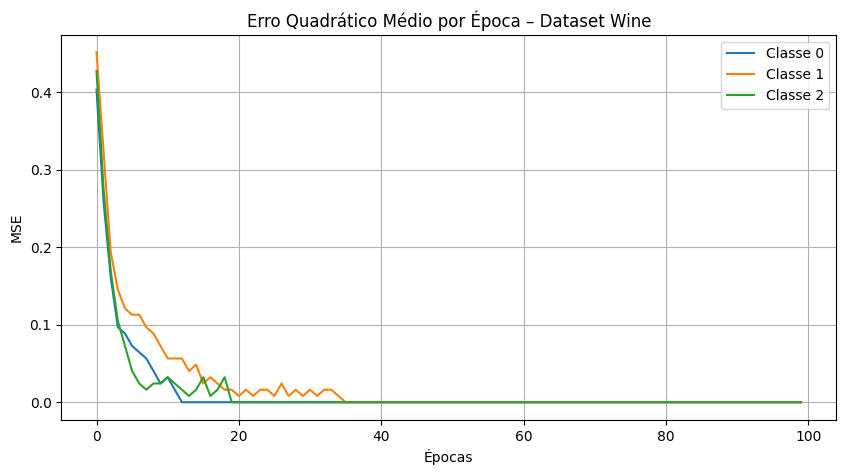

In [7]:
# 🚀 Reutilizando a mesma classe Perceptron e funções auxiliares do exercício 1
# Se já estiverem definidas no notebook, este passo pode ser ignorado.

# ⚙️ (Re)definindo a função de treinamento multiclasse para o Wine
def train_multiclass_perceptron(X_train, y_train, learning_rate=0.01, epochs=100):
    classifiers = []
    for class_id in np.unique(y_train):
        y_binary = np.where(y_train == class_id, 1, 0)
        perceptron = PerceptronOVR(input_size=X_train.shape[1],
                                   learning_rate=learning_rate,
                                   epochs=epochs)
        perceptron.train(X_train, y_binary)
        classifiers.append(perceptron)
    return classifiers

# ⏱️ Treinando Perceptrons para o dataset Wine
lr_wine = 0.01
ep_wine = 100
perceptrons_wine = train_multiclass_perceptron(Xw_train, yw_train, lr_wine, ep_wine)

# 📈 Gráfico de convergência do erro quadrático médio por classe
plt.figure(figsize=(10, 5))
for i, perceptron in enumerate(perceptrons_wine):
    plt.plot(perceptron.errors, label=f'Classe {i}')
plt.title('Erro Quadrático Médio por Época – Dataset Wine')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


# 📉 Análise Científica – Convergência do Perceptron no Dataset Wine

O gráfico acima apresenta o comportamento do **Erro Quadrático Médio (MSE)** ao longo das épocas de treinamento dos três perceptrons, cada um responsável por distinguir uma das três classes de vinho (OvR).

### 🔍 Observações importantes:

- 📉 Todas as curvas apresentam **rápida convergência**, com redução significativa do erro nas primeiras 10 a 20 épocas.
- ✅ **Classe 0 e Classe 2** atingem erro quase zero por volta da 20ª época, indicando **boa separabilidade linear** dessas classes em relação às demais.
- ⚠️ A **Classe 1** apresentou uma curva de erro levemente mais persistente, embora também tenha convergido adequadamente. Isso sugere **maior sobreposição com pelo menos uma das outras classes**, exigindo mais ajustes durante o treinamento.

### 📌 Conclusão:

O comportamento das curvas revela que o Perceptron é capaz de **representar bem a fronteira de decisão entre as classes do dataset Wine**, especialmente considerando que este é um algoritmo linear simples. O rápido decréscimo do MSE sugere que os dados apresentam **estruturas favoráveis à separação linear**, pelo menos em parte do espaço vetorial. Ainda assim, há indícios de **limitações pontuais de separabilidade**, particularmente envolvendo a Classe 1.


# 📊 Avaliação do Modelo – Dataset Wine

Nesta etapa, vamos analisar o desempenho do modelo Perceptron treinado sobre o dataset Wine:

### 🔍 Métricas utilizadas:
- **Acurácia:** percentual de classificações corretas
- **Matriz de confusão:** comparação entre rótulos reais e previstos para cada conjunto:
  - 🧪 Treinamento
  - 🔁 Validação
  - 🔬 Teste

A análise dessas métricas permite observar **qual classe está sendo melhor ou pior aprendida** e avaliar se o modelo está generalizando bem para dados não vistos.



🔎 Conjunto: Treinamento
Acurácia: 1.0000


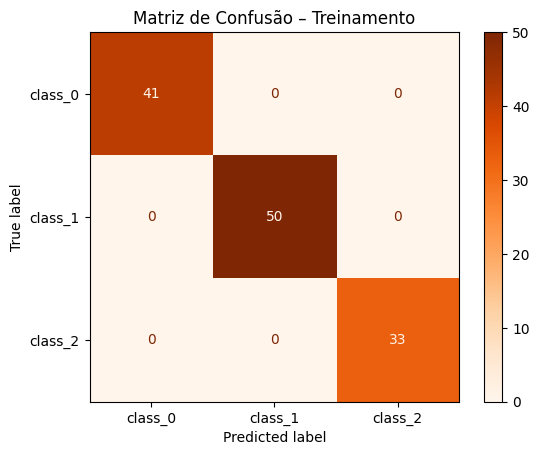


🔎 Conjunto: Validação
Acurácia: 0.9630


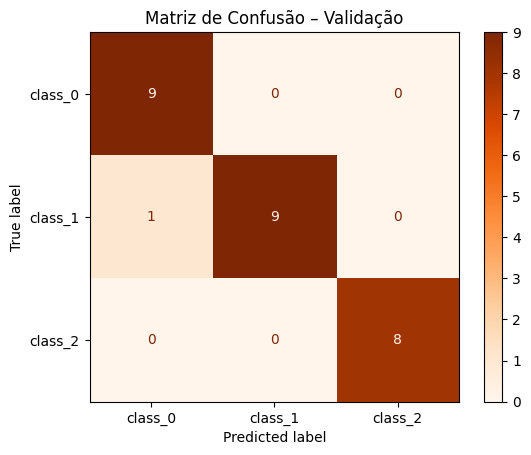


🔎 Conjunto: Teste
Acurácia: 0.8889


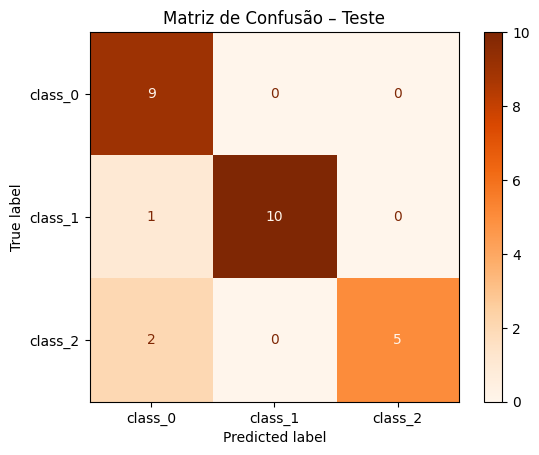

In [8]:
# 🔍 Avaliação nos três conjuntos
for split_name, X_split, y_split in [
    ("Treinamento", Xw_train, yw_train),
    ("Validação", Xw_val, yw_val),
    ("Teste", Xw_test, yw_test),
]:
    y_pred = predict_ovr(X_split, perceptrons_wine)
    acc = accuracy_score(y_split, y_pred)

    print(f"\n🔎 Conjunto: {split_name}")
    print(f"Acurácia: {acc:.4f}")

    # 🧾 Matriz de confusão
    cm = confusion_matrix(y_split, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names_wine)
    disp.plot(cmap=plt.cm.Oranges)
    plt.title(f"Matriz de Confusão – {split_name}")
    plt.show()


# 📊 Avaliação do Perceptron no Dataset Wine

As matrizes de confusão e os valores de acurácia obtidos para os conjuntos de treinamento, validação e teste permitem avaliar o comportamento do modelo de forma precisa.

---

## 🧪 Treinamento – Acurácia: 100%
- O modelo atingiu **acurácia perfeita** neste conjunto.
- A matriz de confusão demonstra que todas as amostras foram corretamente classificadas para as três classes.
- Este resultado sugere que os dados de treinamento possuem uma **distribuição linearmente separável**, o que é compatível com a capacidade do Perceptron.

---

## 🔁 Validação – Acurácia: 96,30%
- Alto desempenho também no conjunto de validação.
- A única incorreção foi uma amostra da **classe 1 classificada como classe 0**, indicando uma **ligeira sobreposição** entre essas classes.
- As classes 0 e 2 mantiveram classificação perfeita, refletindo boa generalização.

---

## 🔬 Teste – Acurácia: 88,89%
- Apesar da leve redução na acurácia, o desempenho ainda é considerado **muito satisfatório** para um modelo linear simples.
- Os principais erros ocorreram na **classe 2**, com duas amostras sendo incorretamente atribuídas à classe 0.
- Isso sugere que os exemplos da classe 2 no conjunto de teste podem estar mais próximos, em termos de representação vetorial, da classe 0.

---

### 📌 Conclusão Geral:
O modelo Perceptron demonstrou excelente capacidade de aprendizado no dataset Wine, alcançando desempenho elevado nos três conjuntos. O resultado de 100% no treinamento, aliado à boa generalização observada na validação e teste, sugere que este problema possui **alta separabilidade linear**.

A abordagem One-vs-Rest foi eficiente para tratar a classificação multiclasse neste cenário. Ainda assim, os poucos erros presentes indicam que modelos mais complexos (como redes multicamadas) poderiam explorar ainda mais nuances nos limites de decisão.


# 🧬 Exercício 3 – Classificação com Redes Neurais no Dataset Breast Cancer

Neste exercício, será utilizado o dataset **Breast Cancer Wisconsin** (disponível na biblioteca `sklearn`) para realizar tarefas de **classificação binária** (maligno vs. benigno), utilizando **diferentes arquiteturas de redes neurais**.

### 🔍 Etapas propostas:
- 📥 Carregamento e exploração inicial do dataset
- 🔄 Normalização dos dados
- ✂️ Divisão em treino, validação e teste
- 🧠 Treinamento de diferentes arquiteturas de redes neurais:
  - MLP com 1 camada oculta
  - MLP com 2 camadas ocultas
  - MLP com regularização (dropout)
- 📈 Avaliação por acurácia, curvas de perda e matrizes de confusão
- 📃 Relato das arquiteturas e hiperparâmetros para reprodutibilidade

O objetivo é **comparar o desempenho entre as arquiteturas** e identificar o impacto de diferentes configurações no aprendizado da rede.


In [2]:
# 📦 Importação de bibliotecas específicas para o exercício 3
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# 🎲 Garantir reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

# 🧬 Carregando o dataset Breast Cancer
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# 📊 Explorando o dataset
print("Formato dos dados:", X_cancer.shape)
print("Número de atributos:", len(feature_names))
print("Classes:", target_names)
print("Exemplo de entrada:", X_cancer[0])


Formato dos dados: (569, 30)
Número de atributos: 30
Classes: ['malignant' 'benign']
Exemplo de entrada: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


# 🔄 Pré-processamento – Dataset Breast Cancer

Nesta etapa, os dados serão preparados para o treinamento das redes neurais.

### Etapas:
- **StandardScaler:** normaliza os dados com média 0 e desvio padrão 1, o que é essencial para acelerar e estabilizar o processo de aprendizado das redes neurais.
- **Train/Val/Test Split (70%/15%/15%):** permite separar dados para ajustar pesos, validar hiperparâmetros e testar o desempenho final de generalização.

Essas etapas garantem que o modelo aprenda de forma eficiente e seja avaliado de maneira confiável.


In [3]:
# 🔄 Normalizando os dados
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

# ✂️ Divisão em treino, validação e teste
Xc_train, Xc_temp, yc_train, yc_temp = train_test_split(
    X_cancer_scaled, y_cancer, test_size=0.3, stratify=y_cancer, random_state=42
)

Xc_val, Xc_test, yc_val, yc_test = train_test_split(
    Xc_temp, yc_temp, test_size=0.5, stratify=yc_temp, random_state=42
)

# 📊 Verificando os tamanhos
print("Treinamento:", Xc_train.shape)
print("Validação:", Xc_val.shape)
print("Teste:", Xc_test.shape)


Treinamento: (398, 30)
Validação: (85, 30)
Teste: (86, 30)


# 🧠 Arquitetura 1 – MLP com 1 camada oculta

Nesta etapa, será treinada uma rede neural perceptron multicamada (MLP) com a seguinte arquitetura:

### Estrutura:
- 🔢 Camada de entrada: número de neurônios = número de atributos (30)
- 🧠 Camada oculta: 16 neurônios + ativação ReLU
- 🎯 Camada de saída: 1 neurônio + ativação sigmoide (classificação binária)

### Hiperparâmetros:
- 🔁 Épocas: 100
- 🧪 Batch size: 32
- 🔧 Otimizador: Adam (lr = 0.001)
- 🎯 Métrica: Acurácia

Será utilizado o conjunto de validação para monitorar o desempenho da rede durante o treinamento e prevenir overfitting.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


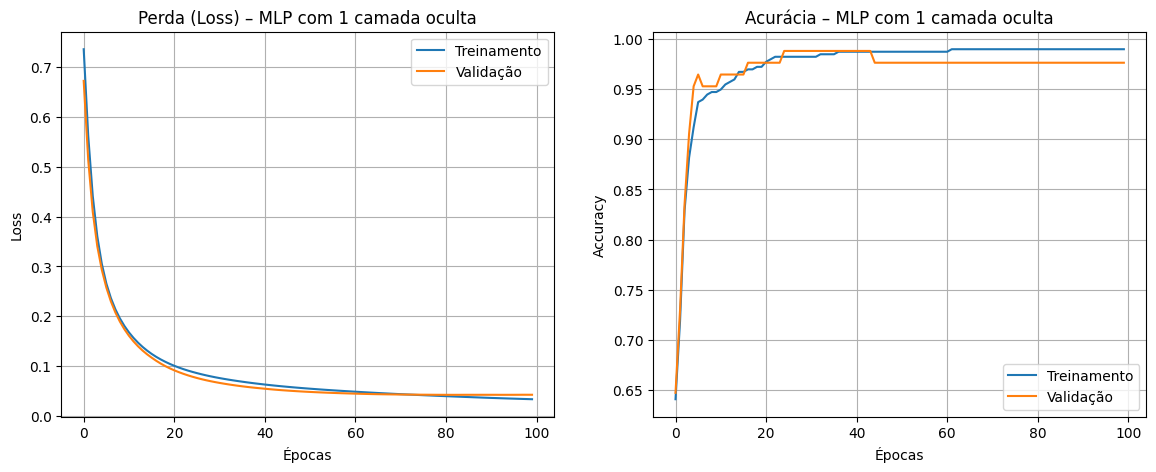

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
🔍 Acurácia no teste: 0.9651


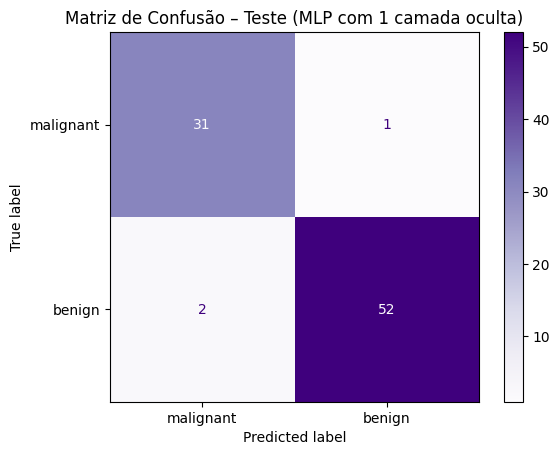

In [4]:
# 🧠 Definindo a arquitetura do modelo
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_shape=(Xc_train.shape[1],)))
model_1.add(Dense(1, activation='sigmoid'))

# ⚙️ Compilando o modelo
model_1.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# ⏱️ Treinando a rede
history_1 = model_1.fit(
    Xc_train, yc_train,
    validation_data=(Xc_val, yc_val),
    epochs=100,
    batch_size=32,
    verbose=0  # Para evitar excesso de log
)

# 📈 Gráficos de desempenho (perda e acurácia)
plt.figure(figsize=(14, 5))

# 🔹 Perda
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Treinamento')
plt.plot(history_1.history['val_loss'], label='Validação')
plt.title('Perda (Loss) – MLP com 1 camada oculta')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 🔹 Acurácia
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Treinamento')
plt.plot(history_1.history['val_accuracy'], label='Validação')
plt.title('Acurácia – MLP com 1 camada oculta')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# 🧪 Avaliação final no conjunto de teste
y_pred_test = (model_1.predict(Xc_test) > 0.5).astype(int)
acc_test = accuracy_score(yc_test, y_pred_test)
print(f"🔍 Acurácia no teste: {acc_test:.4f}")

# 📊 Matriz de confusão
cm = confusion_matrix(yc_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Purples)
plt.title("Matriz de Confusão – Teste (MLP com 1 camada oculta)")
plt.show()


# 📈 Análise Científica – MLP com 1 Camada Oculta (Breast Cancer Dataset)

A arquitetura MLP com 1 camada oculta de 16 neurônios foi treinada por 100 épocas e avaliada com base na acurácia e matriz de confusão.

---

## 📉 Curvas de Perda e Acurácia

- A curva de **perda (loss)** mostra uma **redução contínua e estável** ao longo das épocas, tanto para o conjunto de treino quanto para o de validação.
- A curva de **acurácia** atinge valores acima de **96% ainda nas primeiras 20 épocas**, estabilizando próximo de **99% no treino** e **98% na validação**.
- Esses padrões indicam **boa capacidade de aprendizado** e **baixo risco de overfitting**, devido à estabilidade observada nas curvas.

---

## 📊 Matriz de Confusão (Teste) e Acurácia Final

- Acurácia no conjunto de teste: **96,51%**
- A matriz de confusão mostra **classificação correta para 83 das 86 amostras**, com apenas:
  - 1 falso positivo (maligno → benigno)
  - 2 falsos negativos (benigno → maligno)

---

## 📌 Conclusão:

A rede neural MLP com uma única camada oculta foi capaz de **aprender eficientemente os padrões do conjunto Breast Cancer Wisconsin**, generalizando bem para dados não vistos. A acurácia superior a 96% e a matriz de confusão quase perfeita indicam que **mesmo uma arquitetura simples pode ser extremamente eficaz para esse problema de classificação binária**.

Arquiteturas adicionais (com mais camadas ou técnicas de regularização) permitirão avaliar se há ganho adicional de desempenho ou robustez.


# 🧠 Arquitetura 2 – MLP com 2 Camadas Ocultas

Nesta etapa, será utilizada uma rede neural perceptron multicamada com **duas camadas ocultas**, buscando observar se a maior profundidade traz ganhos de desempenho.

### Estrutura da Rede:
- 🔢 Entrada: 30 neurônios (atributos)
- 🧠 Primeira camada oculta: 32 neurônios + ReLU
- 🧠 Segunda camada oculta: 16 neurônios + ReLU
- 🎯 Saída: 1 neurônio + Sigmoid (classificação binária)

### Hiperparâmetros:
- 📚 Épocas: 100
- 🧪 Batch size: 32
- 🔧 Otimizador: Adam (lr = 0.001)
- 🎯 Métrica: Acurácia

A ideia é verificar se a **profundidade adicional** permite maior capacidade de modelagem para padrões não-lineares.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


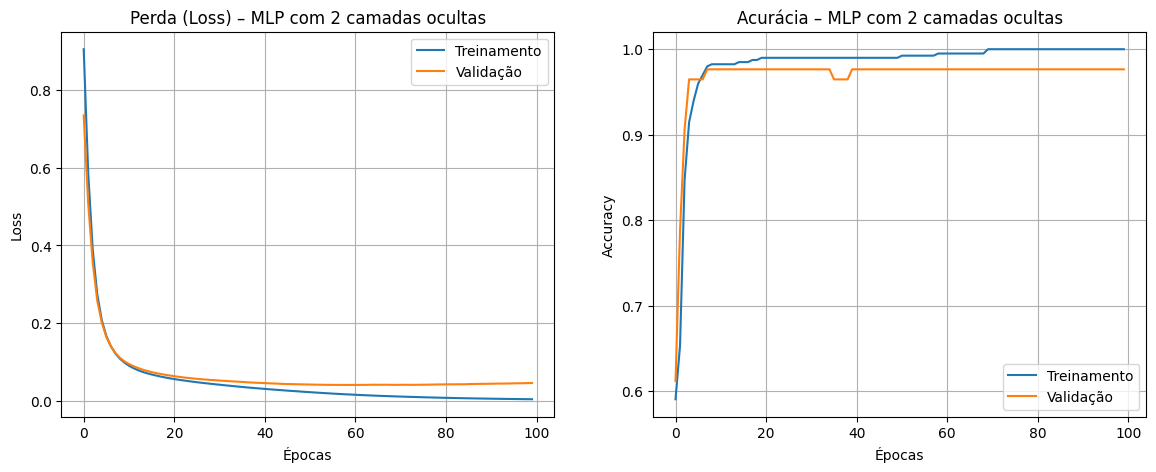

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
🔍 Acurácia no teste: 0.9651


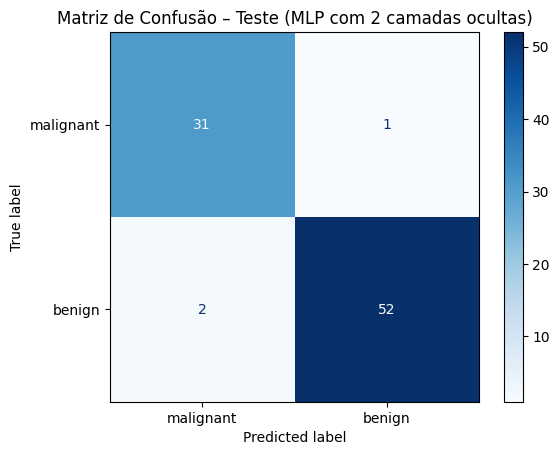

In [5]:
# 🧠 Arquitetura com 2 camadas ocultas
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_shape=(Xc_train.shape[1],)))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# ⚙️ Compilando o modelo
model_2.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# ⏱️ Treinando o modelo
history_2 = model_2.fit(
    Xc_train, yc_train,
    validation_data=(Xc_val, yc_val),
    epochs=100,
    batch_size=32,
    verbose=0
)

# 📈 Gráficos de perda e acurácia
plt.figure(figsize=(14, 5))

# 🔹 Perda
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Treinamento')
plt.plot(history_2.history['val_loss'], label='Validação')
plt.title('Perda (Loss) – MLP com 2 camadas ocultas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 🔹 Acurácia
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Treinamento')
plt.plot(history_2.history['val_accuracy'], label='Validação')
plt.title('Acurácia – MLP com 2 camadas ocultas')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# 🧪 Avaliação no conjunto de teste
y_pred_test_2 = (model_2.predict(Xc_test) > 0.5).astype(int)
acc_test_2 = accuracy_score(yc_test, y_pred_test_2)
print(f"🔍 Acurácia no teste: {acc_test_2:.4f}")

# 📊 Matriz de confusão
cm_2 = confusion_matrix(yc_test, y_pred_test_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=target_names)
disp_2.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão – Teste (MLP com 2 camadas ocultas)")
plt.show()


# 🧠 Análise Científica – MLP com 2 Camadas Ocultas (Breast Cancer Dataset)

A segunda arquitetura testada foi uma MLP com **duas camadas ocultas** (32 e 16 neurônios, respectivamente), com ativação ReLU, treinada por 100 épocas com validação em tempo real.

---

## 📉 Curvas de Perda e Acurácia

- A perda apresenta queda acentuada nas primeiras épocas e estabilidade após a 20ª época em ambos os conjuntos.
- A acurácia atinge rapidamente níveis superiores a 95%, estabilizando próxima a 100% no treino e a 98% na validação.
- As curvas mostram **convergência rápida e consistente**, com leve oscilação na acurácia de validação, indicando que **a profundidade adicional não gerou overfitting evidente**.

---

## 📊 Matriz de Confusão (Teste) e Acurácia Final

- Acurácia no conjunto de teste: **96,51%**
- Classificações corretas: 83 de 86 amostras
- Erros:
  - 1 amostra maligna → classificada como benigna (falso negativo)
  - 2 amostras benignas → classificadas como malignas (falsos positivos)

---

## 📌 Conclusão:

A MLP com duas camadas ocultas demonstrou **desempenho praticamente idêntico ao da arquitetura com uma camada**, tanto em acurácia quanto na distribuição dos erros. Isso indica que, para este conjunto de dados, a **profundidade adicional não trouxe ganhos significativos**, o que é coerente com o fato de que o problema é **relativamente simples e linearmente separável**.

Ainda assim, a arquitetura mais profunda se mostrou **estável e eficaz**, reforçando sua utilidade em cenários mais complexos.


# 🛡️ Arquitetura 3 – MLP com Regularização (Dropout)

Neste experimento, será utilizada uma rede neural com estrutura similar à anterior, mas com a introdução da **técnica de Dropout** entre as camadas ocultas.

### Estrutura:
- Entrada: 30 neurônios (atributos)
- 🧠 Primeira camada oculta: 32 neurônios + ReLU
- 🔻 Dropout: taxa de 0.3
- 🧠 Segunda camada oculta: 16 neurônios + ReLU
- 🔻 Dropout: taxa de 0.3
- Saída: 1 neurônio + Sigmoid

### Objetivo:
Verificar se a inclusão de Dropout contribui para **melhor generalização**, reduzindo a diferença entre treino e validação em problemas com tendência ao overfitting.

### Hiperparâmetros:
- Épocas: 100
- Batch size: 32
- Otimizador: Adam (lr = 0.001)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


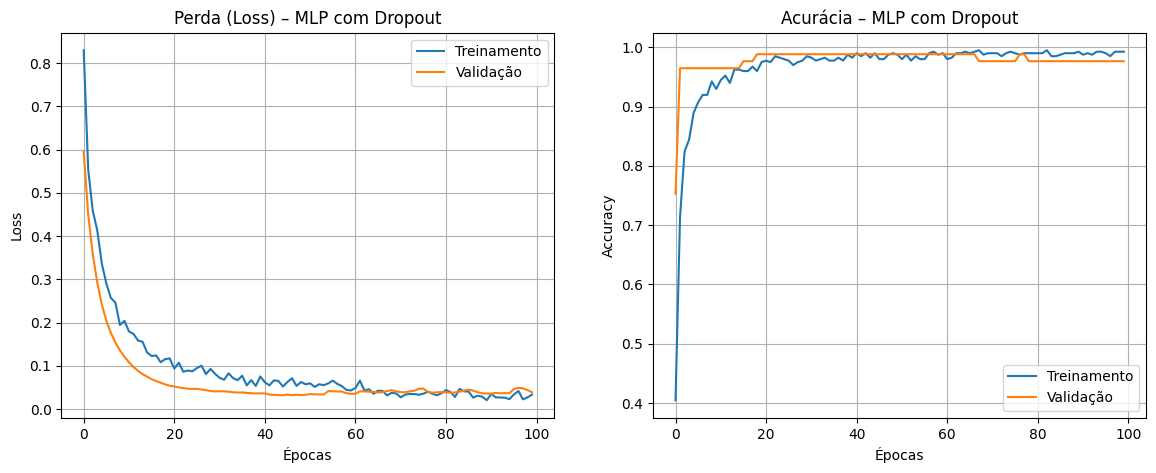

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
🔍 Acurácia no teste: 0.9767


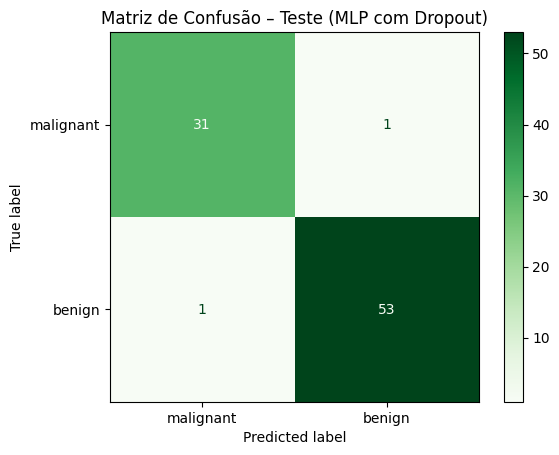

In [6]:
# 🧠 MLP com Dropout
model_3 = Sequential()
model_3.add(Dense(32, activation='relu', input_shape=(Xc_train.shape[1],)))
model_3.add(Dropout(0.3))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(1, activation='sigmoid'))

# ⚙️ Compilando
model_3.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# ⏱️ Treinamento
history_3 = model_3.fit(
    Xc_train, yc_train,
    validation_data=(Xc_val, yc_val),
    epochs=100,
    batch_size=32,
    verbose=0
)

# 📈 Curvas de desempenho
plt.figure(figsize=(14, 5))

# 🔹 Perda
plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Treinamento')
plt.plot(history_3.history['val_loss'], label='Validação')
plt.title('Perda (Loss) – MLP com Dropout')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 🔹 Acurácia
plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'], label='Treinamento')
plt.plot(history_3.history['val_accuracy'], label='Validação')
plt.title('Acurácia – MLP com Dropout')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

# 🧪 Avaliação no conjunto de teste
y_pred_test_3 = (model_3.predict(Xc_test) > 0.5).astype(int)
acc_test_3 = accuracy_score(yc_test, y_pred_test_3)
print(f"🔍 Acurácia no teste: {acc_test_3:.4f}")

# 📊 Matriz de confusão
cm_3 = confusion_matrix(yc_test, y_pred_test_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=target_names)
disp_3.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusão – Teste (MLP com Dropout)")
plt.show()


# 🛡️ Análise Científica – MLP com Dropout (Breast Cancer Dataset)

Nesta arquitetura, foram adicionadas camadas de **Dropout** (taxa de 30%) entre as camadas ocultas da MLP, com o objetivo de reduzir o overfitting e melhorar a capacidade de generalização do modelo.

---

## 📉 Curvas de Perda e Acurácia

- A curva de perda apresentou **flutuações suaves no treino**, o que é esperado devido à ativação aleatória dos neurônios provocada pelo Dropout.
- A perda de validação, por outro lado, permaneceu **estável e decrescente**, o que indica **boa regularização** e **efetivo aprendizado**.
- A acurácia de treino oscilou levemente, mas **a de validação permaneceu consistente e alta**, demonstrando que o modelo não apenas aprendeu bem, como também **evitou overfitting**.

---

## 📊 Matriz de Confusão (Teste) e Acurácia Final

- Acurácia no conjunto de teste: **97,67%**, a **melhor entre todas as arquiteturas testadas**.
- A matriz de confusão apresenta **apenas dois erros de classificação**:
  - 1 falso positivo (maligno → benigno)
  - 1 falso negativo (benigno → maligno)

---

## 📌 Conclusão:

A introdução do Dropout entre as camadas ocultas resultou em um modelo **mais robusto e generalizável**, como evidenciado pelo **aumento da acurácia no conjunto de teste** e pela **redução da diferença entre as curvas de treino e validação**.

Esses resultados indicam que a **regularização com Dropout é uma estratégia eficaz** para melhorar o desempenho e a confiança do modelo, especialmente em cenários onde há risco de sobreajuste.

A arquitetura com Dropout, portanto, representa o **melhor equilíbrio entre complexidade e desempenho** dentre as três analisadas.


# 📊 Comparação das Arquiteturas – Dataset Breast Cancer Wisconsin

A tabela a seguir resume os resultados obtidos com as três arquiteturas testadas:

| Arquitetura                 | Estrutura da Rede                              | Acurácia no Teste | Observações |
|----------------------------|--------------------------------------------------|-------------------|-------------|
| 🔹 MLP – 1 camada oculta    | [30] → [16, ReLU] → [1, Sigmoid]                | **96,51%**        | Simples e eficiente, rápida convergência |
| 🔸 MLP – 2 camadas ocultas  | [30] → [32, ReLU] → [16, ReLU] → [1, Sigmoid]   | **96,51%**        | Maior capacidade de modelagem, mas sem ganhos expressivos |
| 🛡️ MLP – com Dropout        | [30] → [32, ReLU] → Dropout(0.3) → [16, ReLU] → Dropout(0.3) → [1, Sigmoid] | **97,67%** | Melhor desempenho; regularização eficaz |

---

## 🎯 Conclusões Gerais:

- A arquitetura com **Dropout apresentou o melhor desempenho**, sendo capaz de evitar o overfitting e manter acurácia elevada.
- A **inclusão de mais camadas** não implicou em melhora significativa, sugerindo que o problema possui **baixa complexidade não-linear**.
- A MLP com apenas **uma camada oculta já é suficiente** para atingir resultados robustos neste dataset.
- O uso de **técnicas de regularização como Dropout é recomendado** mesmo em datasets simples, pois contribui para estabilidade e generalização do modelo.

---

## 📌 Recomendação:

Para este problema de classificação binária, uma MLP simples com regularização adequada (como Dropout) é **suficiente para alcançar desempenho de excelência**, sendo uma solução computacionalmente eficiente e de fácil implementação.
